## IMAGE CLASSIFICATION USING LOGISTIC REGRESSION

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [2]:
dataset = MNIST(root='data/', download=True, train= True)
test_data = MNIST(root='data/' , train=False)

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test

Label: 7


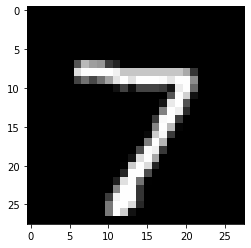

In [5]:
image, label = test_data[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

### Transform
Pytorch don't know to process with images so we need to transform images to tensors

In [6]:
import torchvision.transforms as transforms

In [7]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [8]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
image_tensor , label = dataset[0]
print(image_tensor)  
print(label)
print(image_tensor.shape)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

### Spliting the datasets

In [10]:
from torch.utils.data import random_split

In [11]:
train, val = random_split(dataset, [50000, 10000])
len(train), len(val)

(50000, 10000)

In [12]:
# Loading the data
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train, batch_size, shuffle=True)
val_loader = DataLoader(val, batch_size)

### Model

In [13]:
import torch.nn as nn
import torch.nn.functional as functional

In [14]:
input_size = 28*28
num_classes = 10

In [15]:
class Model(nn.Module):
    def __init__(self):
        super().__init__() # for calling the __init__ of the superclass (nn)
        self.linear = nn.Linear(input_size, num_classes)    
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        out = functional.softmax(out,dim=1)
        return out
    
model1  = Model()

In [16]:
# Randomly initialized weights and biases
print(model1.linear.weight.shape, model1.linear.bias.shape)
list(model1.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0207,  0.0257,  0.0295,  ...,  0.0056, -0.0224, -0.0316],
         [ 0.0160, -0.0073, -0.0223,  ..., -0.0250,  0.0285, -0.0130],
         [ 0.0156,  0.0223, -0.0124,  ..., -0.0270,  0.0002,  0.0073],
         ...,
         [-0.0230,  0.0175, -0.0029,  ..., -0.0219,  0.0067, -0.0259],
         [ 0.0071, -0.0224,  0.0230,  ..., -0.0180, -0.0275,  0.0080],
         [ 0.0048,  0.0349, -0.0204,  ..., -0.0206,  0.0226,  0.0026]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0115, -0.0168, -0.0060,  0.0282, -0.0289,  0.0123, -0.0310, -0.0171,
          0.0061, -0.0174], requires_grad=True)]

In [17]:
for images, labels in train_loader:
    output = model1(images)
    break

In [18]:
output

tensor([[0.0968, 0.0749, 0.1382,  ..., 0.0646, 0.0851, 0.1081],
        [0.1211, 0.0781, 0.1221,  ..., 0.1137, 0.0842, 0.0918],
        [0.1159, 0.0965, 0.1054,  ..., 0.1167, 0.1011, 0.1023],
        ...,
        [0.1180, 0.0731, 0.1550,  ..., 0.0803, 0.0697, 0.1047],
        [0.1275, 0.0937, 0.1040,  ..., 0.0945, 0.1067, 0.0863],
        [0.1144, 0.0969, 0.0898,  ..., 0.1068, 0.0990, 0.0985]],
       grad_fn=<SoftmaxBackward>)

In [19]:
output.shape # one batch 128 images for each image 10 op

torch.Size([128, 10])

In [20]:
output[:2].data # sample ops

tensor([[0.0968, 0.0749, 0.1382, 0.1005, 0.1378, 0.1134, 0.0806, 0.0646, 0.0851,
         0.1081],
        [0.1211, 0.0781, 0.1221, 0.1204, 0.0875, 0.1177, 0.0634, 0.1137, 0.0842,
         0.0918]])

*Some of the values are negative but we need probability for this we are going to sigmoid or softmax function*

In [21]:
max_probs , preds = torch.max(output, dim=1)
print(preds)
print(max_probs)

tensor([2, 2, 7, 0, 3, 1, 5, 7, 9, 7, 9, 7, 1, 2, 0, 9, 2, 7, 8, 1, 0, 0, 1, 9,
        2, 9, 2, 0, 5, 7, 5, 9, 1, 9, 5, 3, 2, 7, 7, 9, 9, 0, 8, 1, 3, 2, 5, 7,
        7, 7, 1, 7, 1, 2, 9, 8, 7, 2, 7, 0, 8, 2, 9, 7, 2, 0, 4, 9, 8, 7, 7, 5,
        2, 9, 8, 8, 8, 7, 8, 5, 9, 2, 3, 9, 2, 9, 4, 2, 7, 7, 2, 9, 2, 7, 7, 7,
        3, 9, 0, 7, 2, 0, 9, 9, 2, 7, 9, 5, 5, 7, 9, 1, 3, 7, 9, 7, 5, 7, 2, 8,
        9, 9, 9, 2, 8, 2, 3, 3])
tensor([0.1382, 0.1221, 0.1167, 0.1256, 0.1159, 0.1224, 0.1196, 0.1450, 0.1245,
        0.1338, 0.1418, 0.1235, 0.1194, 0.1311, 0.1231, 0.1356, 0.1405, 0.1633,
        0.1147, 0.1182, 0.1241, 0.1367, 0.1182, 0.1206, 0.1369, 0.1540, 0.1240,
        0.1292, 0.1157, 0.1317, 0.1175, 0.1210, 0.1171, 0.1291, 0.1441, 0.1243,
        0.1475, 0.1250, 0.1180, 0.1201, 0.1216, 0.1253, 0.1221, 0.1283, 0.1198,
        0.1158, 0.1330, 0.1195, 0.1211, 0.1238, 0.1242, 0.1248, 0.1131, 0.1247,
        0.1408, 0.1315, 0.1166, 0.1345, 0.1259, 0.1198, 0.1167, 0.1327, 0.1241,
       

In [22]:
labels

tensor([2, 6, 0, 0, 2, 5, 8, 2, 2, 2, 8, 1, 1, 3, 1, 0, 2, 5, 3, 1, 8, 0, 2, 9,
        3, 8, 7, 5, 5, 0, 8, 9, 1, 9, 6, 0, 5, 7, 7, 4, 7, 9, 5, 7, 7, 2, 4, 7,
        9, 1, 7, 4, 2, 3, 7, 9, 3, 8, 7, 8, 8, 0, 5, 3, 0, 3, 2, 5, 3, 7, 3, 0,
        6, 0, 8, 6, 4, 2, 2, 9, 8, 3, 3, 5, 5, 3, 7, 4, 7, 5, 0, 2, 5, 5, 6, 6,
        4, 5, 7, 1, 6, 5, 0, 8, 0, 4, 2, 7, 8, 9, 3, 9, 0, 1, 5, 4, 4, 7, 3, 7,
        8, 9, 7, 3, 1, 5, 4, 4])

In [23]:
preds

tensor([2, 2, 7, 0, 3, 1, 5, 7, 9, 7, 9, 7, 1, 2, 0, 9, 2, 7, 8, 1, 0, 0, 1, 9,
        2, 9, 2, 0, 5, 7, 5, 9, 1, 9, 5, 3, 2, 7, 7, 9, 9, 0, 8, 1, 3, 2, 5, 7,
        7, 7, 1, 7, 1, 2, 9, 8, 7, 2, 7, 0, 8, 2, 9, 7, 2, 0, 4, 9, 8, 7, 7, 5,
        2, 9, 8, 8, 8, 7, 8, 5, 9, 2, 3, 9, 2, 9, 4, 2, 7, 7, 2, 9, 2, 7, 7, 7,
        3, 9, 0, 7, 2, 0, 9, 9, 2, 7, 9, 5, 5, 7, 9, 1, 3, 7, 9, 7, 5, 7, 2, 8,
        9, 9, 9, 2, 8, 2, 3, 3])

In [24]:
def accuracy(outputs,labels):
    _, pred = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(pred == labels).item() / len(preds))

In [25]:
accuracy(output,labels)

tensor(0.1797)

### Loss Function

In [26]:
loss_func = functional.cross_entropy

In [27]:
loss = loss_func(output, labels)
print(loss)

tensor(2.2993, grad_fn=<NllLossBackward>)


This is one forward propogation of the logistic regression

### Let's Build the complete model

In [28]:
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self.forward(images)                  # Generate predictions
        loss = functional.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self.forward(images)                    # Generate predictions
        loss = functional.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)                   # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [29]:
model = MNISTModel()

In [30]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [31]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3256239891052246, 'val_acc': 0.08890426903963089}

In [32]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4309, val_acc: 0.8781
Epoch [1], val_loss: 0.3536, val_acc: 0.8932
Epoch [2], val_loss: 0.3272, val_acc: 0.8979
Epoch [3], val_loss: 0.3125, val_acc: 0.9024
Epoch [4], val_loss: 0.3028, val_acc: 0.9061


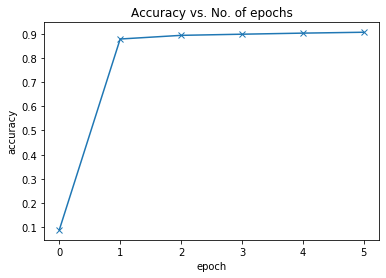

In [33]:
# Replace these values with your results
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');